In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv
/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
house_data = pd.read_csv("../input/melbourne-housing-market/Melbourne_housing_FULL.csv")

In [4]:
house_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
house_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [6]:
house_data.index

RangeIndex(start=0, stop=34857, step=1)

In [7]:
house_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

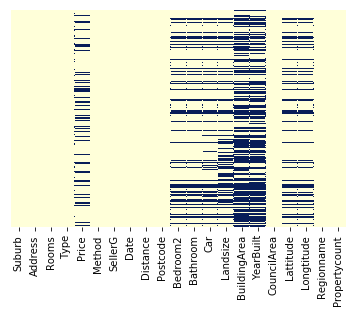

In [8]:
sns.heatmap(house_data.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

In [9]:
house_data['Price'].fillna(house_data['Price'].mean(),inplace=True)

In [10]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            34857 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [11]:
house_data['Bedroom2'].fillna(house_data['Bedroom2'].mean(),inplace=True)

In [12]:
house_data['Bathroom'].fillna(house_data['Bathroom'].mean(),inplace=True)

In [13]:
house_data.drop('Car',axis=1,inplace=True)

In [14]:
house_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

In [15]:
house_data['Landsize'].fillna(house_data['Landsize'].mean(),inplace=True)

In [16]:
house_data.drop('BuildingArea',axis=1,inplace=True)

In [17]:
house_data['YearBuilt'].fillna(house_data['YearBuilt'].mean(),inplace=True)

In [18]:
house_data['Lattitude'].fillna(house_data['Lattitude'].mean(),inplace=True)
house_data['Longtitude'].fillna(house_data['Longtitude'].mean(),inplace=True)

In [19]:
house_data['Regionname'].value_counts()

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64

In [20]:
house_data['Regionname'].fillna(house_data['Regionname'].mode()[0],inplace=True)

In [21]:
house_data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         1
Postcode         1
Bedroom2         0
Bathroom         0
Landsize         0
YearBuilt        0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    3
dtype: int64

In [22]:
house_data.dropna(inplace=True)

In [23]:
house_data.shape

(34854, 19)

In [24]:
house_data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Landsize         0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [25]:
house_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,1.050173e+06,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,126.0,1965.289885,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1.480000e+06,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,202.0,1965.289885,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1.035000e+06,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,156.0,1900.000000,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1.050173e+06,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,0.0,1965.289885,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1.465000e+06,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,134.0,1900.000000,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [26]:
house_data['Type'].value_counts()

h    23978
u     7296
t     3580
Name: Type, dtype: int64

In [27]:
house_data.loc[house_data['Price'].idxmax()]

Suburb                        Brighton
Address                      6 Cole St
Rooms                                4
Type                                 h
Price                         1.12e+07
Method                              VB
SellerG                  hockingstuart
Date                        28/10/2017
Distance                          10.5
Postcode                          3186
Bedroom2                             4
Bathroom                             3
Landsize                          1400
YearBuilt                      1965.29
CouncilArea       Bayside City Council
Lattitude                     -37.8933
Longtitude                     144.986
Regionname       Southern Metropolitan
Propertycount                    10579
Name: 25635, dtype: object

In [28]:
house_data.loc[house_data['Price']==house_data['Price'].min()].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
4378,Footscray,202/51 Gordon St,1,u,85000.0,PI,Burnham,3/09/2016,6.4,3011.0,1.0,1.0,0.0,2007.0,Maribyrnong City Council,-37.7911,144.89,Western Metropolitan,7570.0


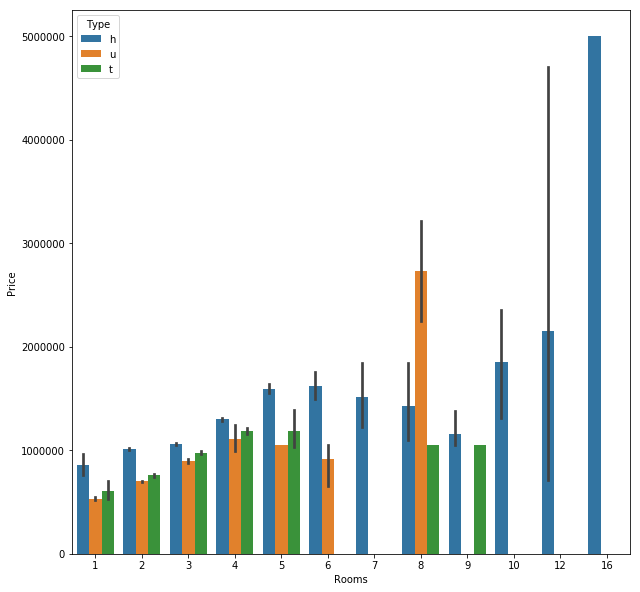

In [29]:
plt.figure(figsize=[10,10])
sns.barplot(x="Rooms",y="Price",data=house_data,hue="Type")

In [30]:
from wordcloud import WordCloud

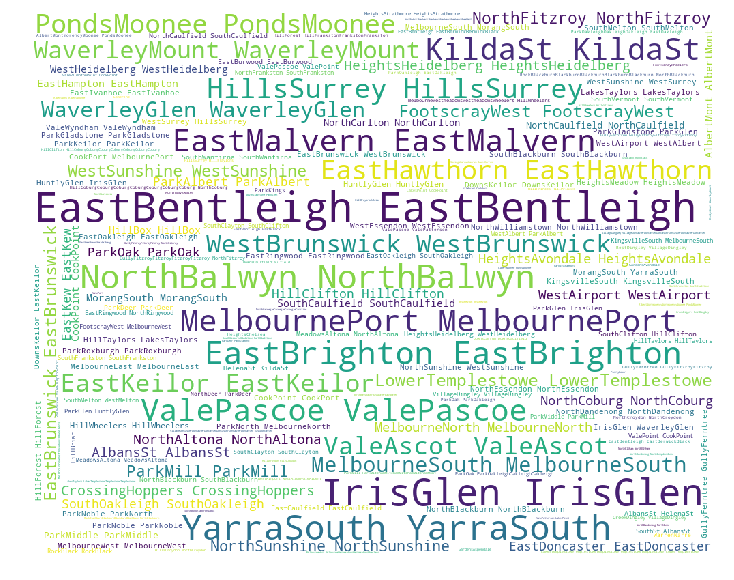

In [31]:
wordcloud = WordCloud(width = 1000, height = 800,  background_color ='white',  max_words=200,max_font_size=200 ,).generate("".join(house_data['Suburb'])) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

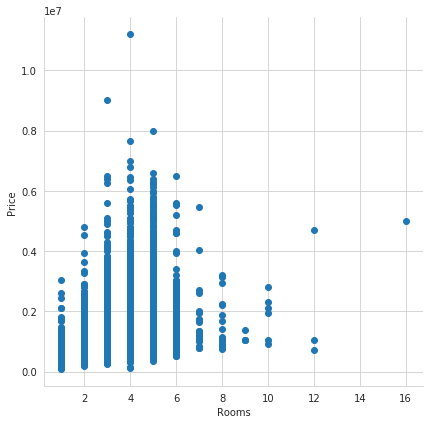

In [32]:
sns.set_style("whitegrid")
sns.FacetGrid(house_data,height=6).map(plt.scatter,'Rooms','Price').add_legend()
plt.show()

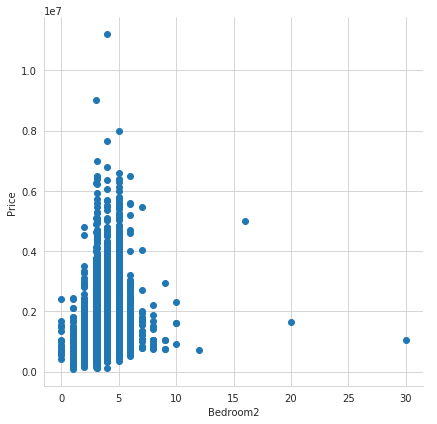

In [33]:
sns.set_style("whitegrid")
sns.FacetGrid(house_data,height=6).map(plt.scatter,'Bedroom2','Price').add_legend()
plt.show()

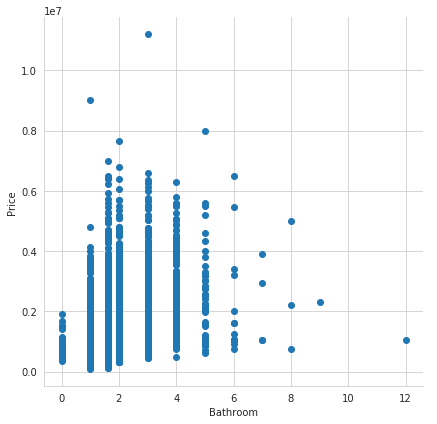

In [34]:
sns.set_style("whitegrid")
sns.FacetGrid(house_data,height=6).map(plt.scatter,'Bathroom','Price').add_legend()
plt.show()


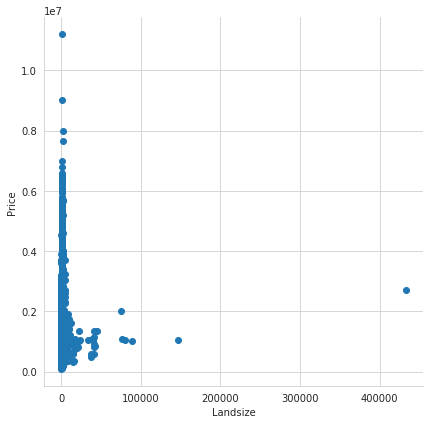

In [35]:
sns.set_style("whitegrid")
sns.FacetGrid(house_data,height=6).map(plt.scatter,'Landsize','Price').add_legend()
plt.show()

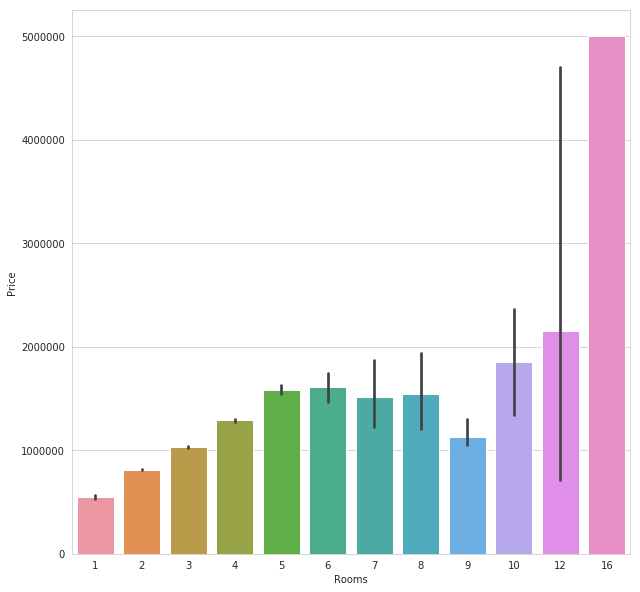

In [36]:
plt.figure(figsize=[10,10])
sns.barplot(x="Rooms",y="Price",data=house_data)

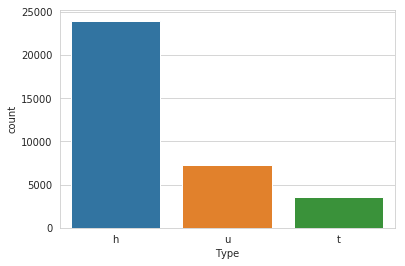

In [37]:
sns.countplot(house_data['Type'])

In [38]:
data =house_data.corr()

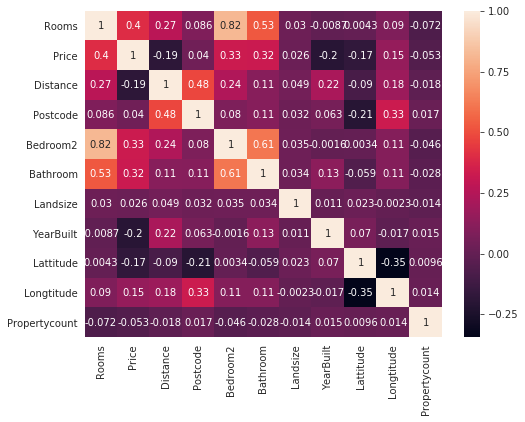

In [39]:
plt.figure(figsize=[8,6])
sns.heatmap(data,annot=True)

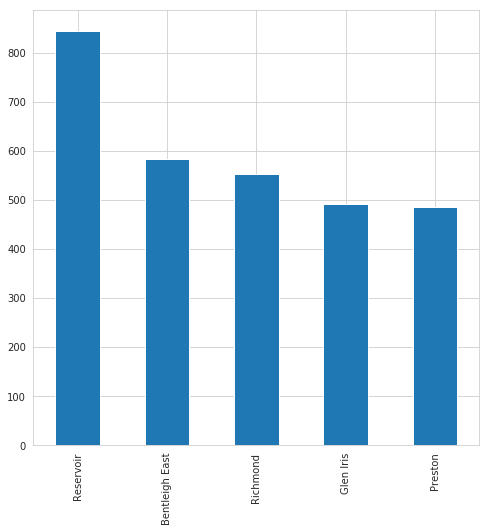

In [40]:
plt.figure(figsize=[8,8])
house_data['Suburb'].value_counts().head(5).plot.bar()

In [41]:
house_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize',
       'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [42]:
X= house_data[[ 'Rooms',  'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize',
       'YearBuilt', 'Lattitude', 'Longtitude', 
       'Propertycount']]
y= house_data['Price']

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4)

In [46]:
lm =LinearRegression()

In [47]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print(lm.intercept_)

-93850886.65614748


In [49]:
lm.coef_

array([ 2.74870021e+05, -3.01658218e+04,  6.32700779e+02, -5.80359755e+04,
        1.49522799e+05,  1.22118030e+01, -3.20569863e+03, -9.65536991e+05,
        4.28804606e+05, -2.64921973e+00])

In [50]:
X_train.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize',
       'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount'],
      dtype='object')

In [51]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coef'])

In [52]:
cdf

,coef
Rooms,274870.020822
Distance,-30165.821820
Postcode,632.700779
Bedroom2,-58035.975527
Bathroom,149522.799442
Landsize,12.211803
YearBuilt,-3205.698628
Lattitude,-965536.990666
Longtitude,428804.605507
Propertycount,-2.649220


In [53]:
prediction = lm.predict(X_test)

In [54]:
prediction

array([1560034.85493293,  768534.21241195, 1224831.62509048, ...,
        602432.28315167, 2188872.33289319,  570773.84277897])

In [55]:
y_test.head()

10487    1.050173e+06
20768    7.500000e+05
4188     1.050173e+06
23400    8.520000e+05
19448    1.315000e+06
Name: Price, dtype: float64

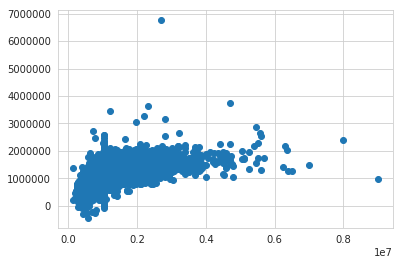

In [56]:
plt.scatter(y_test,prediction)

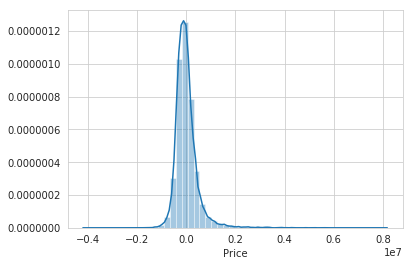

In [57]:
sns.distplot(y_test-prediction)

In [58]:
final_output = pd.DataFrame({'Actual':y_test,'prdict':prediction})

In [59]:
print(final_output.head())

             Actual        prdict
10487  1.050173e+06  1.560035e+06
20768  7.500000e+05  7.685342e+05
4188   1.050173e+06  1.224832e+06
23400  8.520000e+05  1.240909e+06
19448  1.315000e+06  1.216035e+06
